In [1]:
import pandas as pd
import numpy as np

In [3]:
# Load Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
spam = pd.read_csv('/content/drive/MyDrive/spam.csv')

In [6]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [8]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
## Tokenizing
### NLTK1

In [29]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [30]:
from gensim.models import Word2Vec

In [31]:
# Skip-gram
skipgram = Word2Vec(sentences=spam['v2'].apply(word_tokenize), vector_size=100, window=5, min_count=3, workers=4, sg=1)
skipgram.wv.most_similar('you')

[('You', 0.854255199432373),
 ('Hope', 0.8258476257324219),
 ('princess', 0.8143720626831055),
 ('goes', 0.8115286827087402),
 ('They', 0.8109188675880432),
 ('much', 0.8044517636299133),
 ('Are', 0.8036566972732544),
 ('whatever', 0.802902340888977),
 ('some', 0.8027334809303284),
 ('Did', 0.802103579044342)]

In [32]:
# CBOW

In [33]:
cbow = Word2Vec(sentences=spam['v2'].apply(word_tokenize), vector_size=100, window=5, min_count=3, workers=4, sg=0)
cbow.wv.most_similar('you')

[("n't", 0.9961324334144592),
 ('know', 0.995671272277832),
 ('do', 0.9951362013816833),
 ('I', 0.9930908679962158),
 ('want', 0.9902453422546387),
 ('think', 0.9894677996635437),
 ('ca', 0.9875038862228394),
 ('if', 0.9847917556762695),
 ('when', 0.9822913408279419),
 ('have', 0.9799438714981079)]

In [37]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

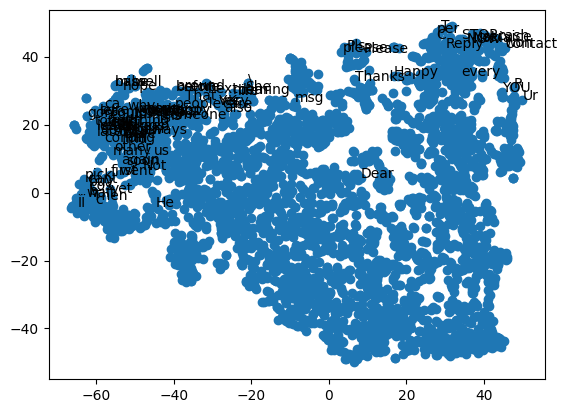

In [38]:
tsne = TSNE(n_components=2, random_state=31)
vectors_tsne = tsne.fit_transform(skipgram.wv.vectors)
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])

for i, word in enumerate(skipgram.wv.index_to_key[200:300]):
    plt.annotate(word, (vectors_tsne[i + 200, 0], vectors_tsne[i +200, 1]))


plt.show()

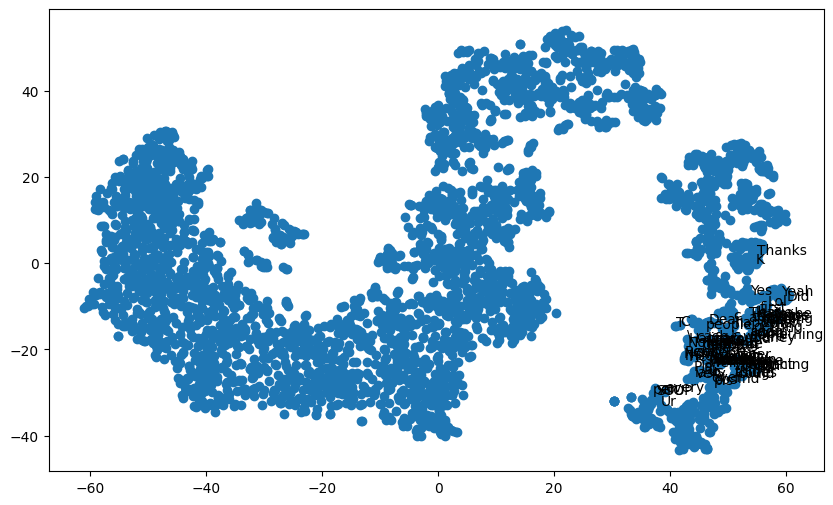

In [36]:
tsne = TSNE(n_components=2, random_state=31)
vectors_tsne = tsne.fit_transform(cbow.wv.vectors)
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])

for i, word in enumerate(cbow.wv.index_to_key[200:300]):
    plt.annotate(word, (vectors_tsne[i + 200, 0], vectors_tsne[i + 200, 1]))


plt.show()